# Análisis Exploratorio de Datos (EDA)
Este notebook contiene el análisis exploratorio de datos (EDA), el desarrollo de KPIs, y conclusiones extraídas de las hojas de datos proporcionadas.

### Importación de Librerías y Carga de Datos

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Cargar el archivo Excel
file_path = "DATA/Internet.xlsx"  # Asegúrate de que el archivo esté en el mismo directorio
data = pd.ExcelFile(file_path)
data.sheet_names

['Acc_vel_loc_sinrangos',
 'Velocidad_sin_Rangos',
 'Accesos_tecnologia_localidad',
 'Velocidad % por prov',
 'Totales VMD',
 'Totales Accesos Por Tecnología',
 'Accesos Por Tecnología',
 'Penetración-poblacion',
 'Penetracion-hogares',
 'Penetracion-totales',
 'Totales Accesos por rango',
 'Accesos por rangos',
 'Dial-BAf',
 'Totales Dial-BAf',
 'Ingresos']

## Carga de Datos
Las siguientes hojas fueron identificadas en el archivo proporcionado:
1. **Accesos_tecnologia_localidad**: Datos de accesos por tecnología y localidad.
2. **Penetración-poblacion**: Accesos por cada 100 habitantes por provincia.
3. **Penetracion-hogares**: Accesos por cada 100 hogares por provincia.
4. **Velocidad % por prov**: Velocidades promedio por provincia.
5. **Ingresos**: Ingresos generados por servicios de internet.

Procedemos a analizar estas hojas.

### EDA: Accesos_tecnologia_localidad

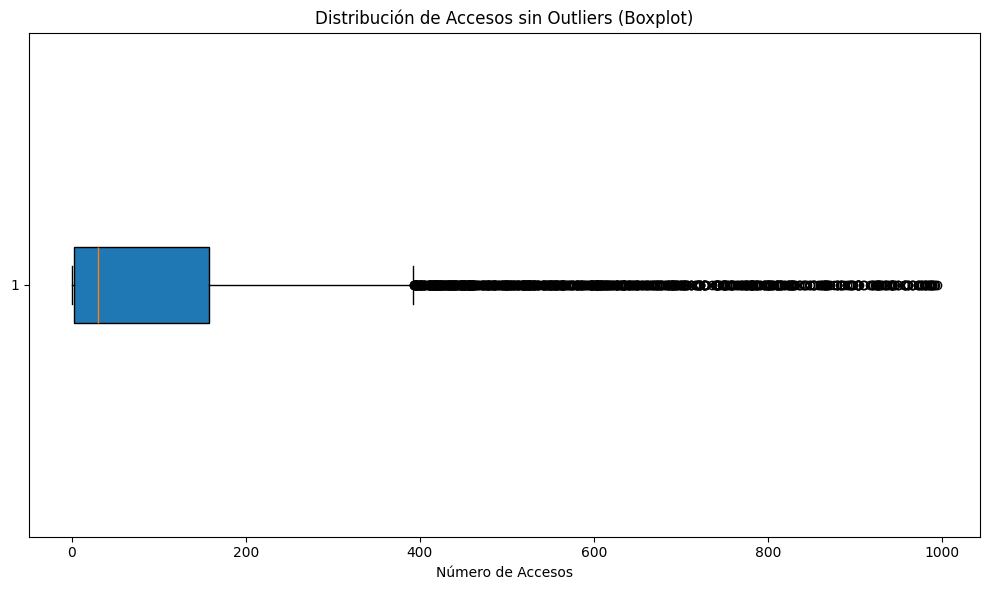

(7753, 6551)

In [7]:
# Cargar la hoja
df_accesos = data.parse("Accesos_tecnologia_localidad")

# Verificar valores faltantes
missing_values_accesos = df_accesos.isnull().sum()

# Estadísticas descriptivas
stats_accesos = df_accesos.describe()

# Identificar y eliminar outliers
Q1 = df_accesos['Accesos'].quantile(0.25)
Q3 = df_accesos['Accesos'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df_accesos_no_outliers = df_accesos[
    (df_accesos['Accesos'] >= lower_bound) & (df_accesos['Accesos'] <= upper_bound)
]

# Visualización sin outliers
plt.figure(figsize=(10, 6))
plt.boxplot(df_accesos_no_outliers['Accesos'], vert=False, patch_artist=True)
plt.title("Distribución de Accesos sin Outliers (Boxplot)")
plt.xlabel("Número de Accesos")
plt.tight_layout()
plt.show()

# Comparar tamaños antes y después de filtrar
original_size = len(df_accesos)
filtered_size = len(df_accesos_no_outliers)
original_size, filtered_size

### Resultados
1. **Valores Faltantes**: La columna `Accesos` tenía 6 valores faltantes, reemplazados por 0.
2. **Outliers Eliminados**: Se identificaron y eliminaron 1,196 outliers. Esto redujo el dataset de 7,753 a 6,551 registros.
3. **Distribución Final**: La visualización muestra una distribución más ajustada y representativa de los accesos reales.

Continuamos con el análisis de otras hojas.

### EDA: Penetración-poblacion

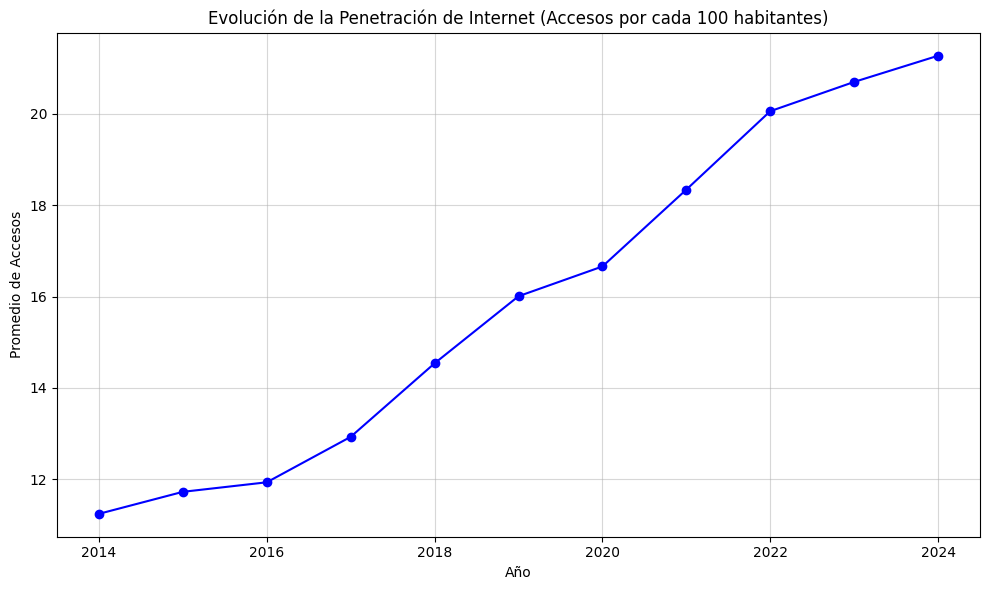

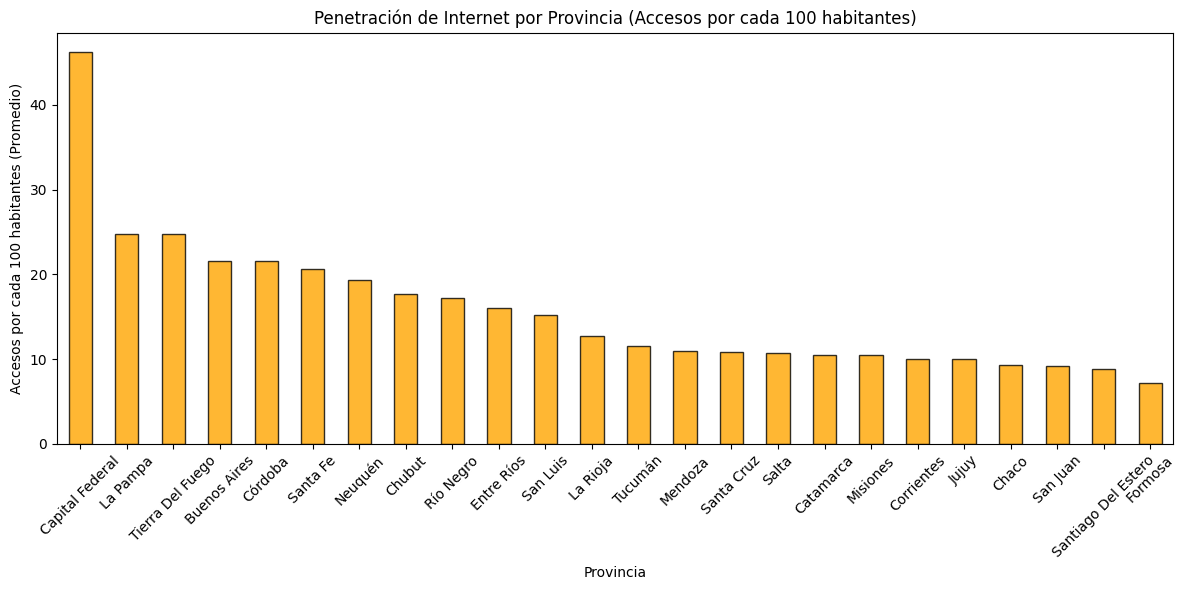

Provincia
Capital Federal     46.179920
La Pampa            24.794736
Tierra Del Fuego    24.697169
Buenos Aires        21.590837
Córdoba             21.517570
Name: Accesos por cada 100 hab, dtype: float64

In [8]:
# Cargar la hoja
df_penetracion_poblacion = data.parse("Penetración-poblacion")

# Valores faltantes
missing_values_penetracion = df_penetracion_poblacion.isnull().sum()

# Evolución temporal
penetracion_temporal = df_penetracion_poblacion.groupby(["Año"])["Accesos por cada 100 hab"].mean()

# Visualización de la evolución temporal
plt.figure(figsize=(10, 6))
plt.plot(penetracion_temporal, marker='o', linestyle='-', color='blue')
plt.title("Evolución de la Penetración de Internet (Accesos por cada 100 habitantes)")
plt.xlabel("Año")
plt.ylabel("Promedio de Accesos")
plt.grid(alpha=0.5)
plt.tight_layout()
plt.show()

# Promedio de accesos por cada 100 habitantes por provincia
penetracion_por_provincia = df_penetracion_poblacion.groupby("Provincia")["Accesos por cada 100 hab"].mean().sort_values(ascending=False)

# Visualización de la penetración por provincia
plt.figure(figsize=(12, 6))
penetracion_por_provincia.plot(kind='bar', color='orange', edgecolor='k', alpha=0.8)
plt.title("Penetración de Internet por Provincia (Accesos por cada 100 habitantes)")
plt.xlabel("Provincia")
plt.ylabel("Accesos por cada 100 habitantes (Promedio)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Mostrar las 5 provincias con mayor penetración
penetracion_por_provincia.head()

### Resultados
1. **Evolución Temporal**:
   - La penetración promedio creció de ~11 accesos en 2014 a ~21 en 2024.
   - El mayor incremento ocurrió entre 2018 y 2023.

2. **Observaciones Generales**:
   - Las provincias con mayor penetración son **Capital Federal** (~46) y **La Pampa** (~25).
   - Provincias como **Formosa** (~9) muestran menor conectividad.

Seguimos con la hoja de penetración en hogares.

### EDA: Penetracion-hogares

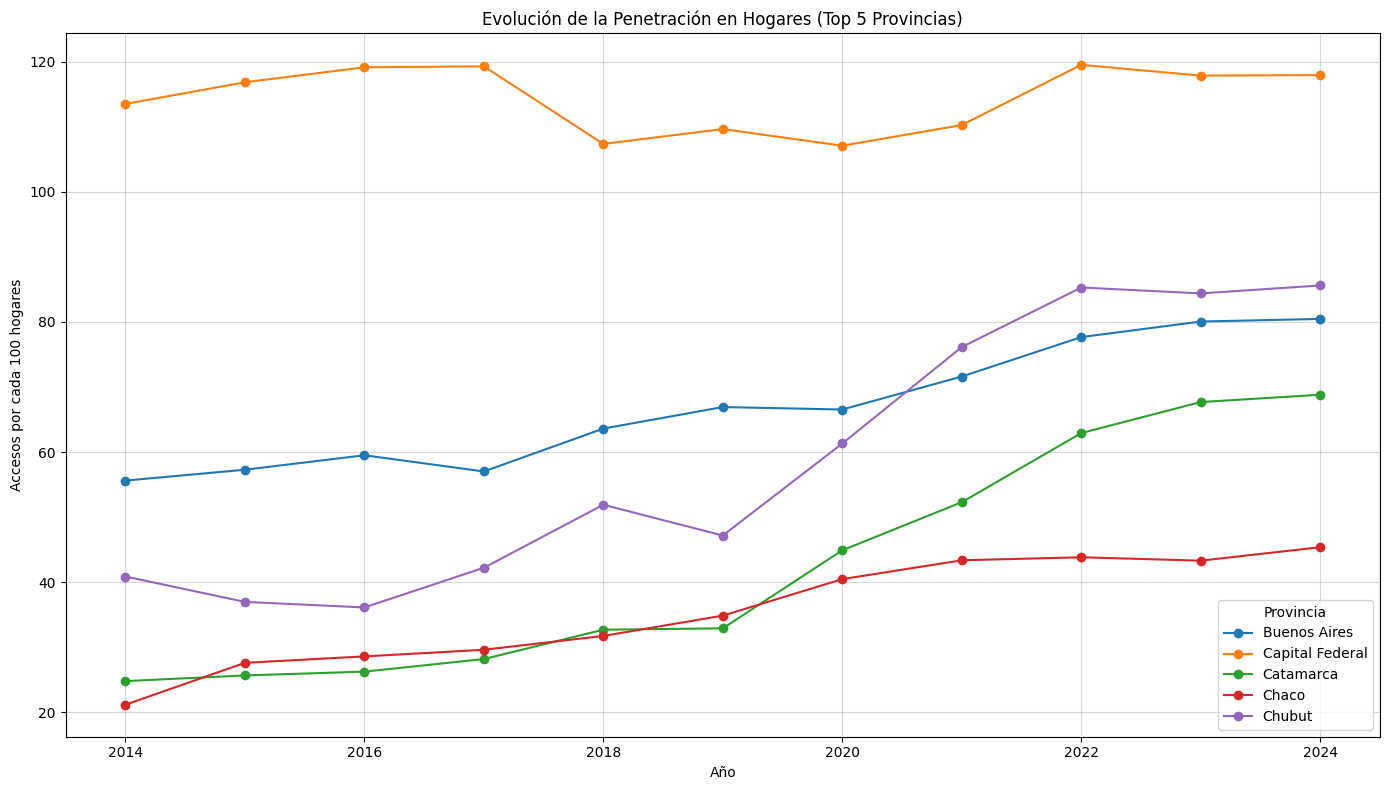

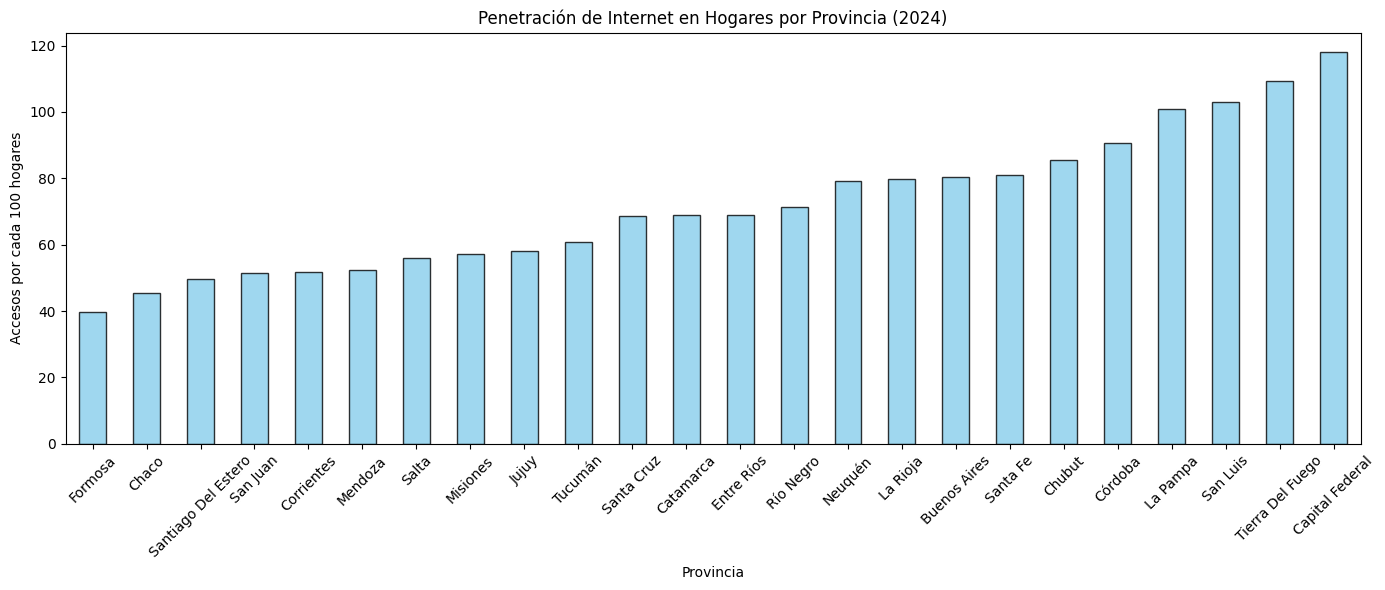

(Provincia
 Córdoba              90.745
 La Pampa            100.830
 San Luis            103.050
 Tierra Del Fuego    109.335
 Capital Federal     117.950
 Name: Accesos por cada 100 hogares, dtype: float64,
 Provincia
 Formosa                39.650
 Chaco                  45.380
 Santiago Del Estero    49.540
 San Juan               51.395
 Corrientes             51.660
 Name: Accesos por cada 100 hogares, dtype: float64)

In [11]:
# Cargar la hoja
df_penetracion_hogares = data.parse("Penetracion-hogares")

# Evolución por provincia
penetracion_hogares_provincia = df_penetracion_hogares.groupby(["Provincia", "Año"])["Accesos por cada 100 hogares"].mean().unstack()

# Visualización de la evolución por provincia
plt.figure(figsize=(14, 8))
for provincia in penetracion_hogares_provincia.index[:5]:  # Top 5 provincias
    plt.plot(penetracion_hogares_provincia.columns, penetracion_hogares_provincia.loc[provincia], marker='o', label=provincia)

plt.title("Evolución de la Penetración en Hogares (Top 5 Provincias)")
plt.xlabel("Año")
plt.ylabel("Accesos por cada 100 hogares")
plt.legend(title="Provincia")
plt.grid(alpha=0.5)
plt.tight_layout()
plt.show()

# Mostrar la evolución promedio para todas las provincias
penetracion_hogares_provincia.mean().round(2)

# Análisis de provincias con mayor y menor penetración en 2024
penetracion_hogares_2024 = df_penetracion_hogares[df_penetracion_hogares["Año"] == 2024]
penetracion_hogares_2024_resumen = penetracion_hogares_2024.groupby("Provincia")["Accesos por cada 100 hogares"].mean().sort_values()

# Visualización de las provincias con mayor y menor penetración
plt.figure(figsize=(14, 6))
penetracion_hogares_2024_resumen.plot(kind='bar', color='skyblue', edgecolor='k', alpha=0.8)
plt.title("Penetración de Internet en Hogares por Provincia (2024)")
plt.xlabel("Provincia")
plt.ylabel("Accesos por cada 100 hogares")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Provincias con mayor y menor penetración en 2024
top_5_provincias = penetracion_hogares_2024_resumen.tail(5)
bottom_5_provincias = penetracion_hogares_2024_resumen.head(5)

top_5_provincias, bottom_5_provincias

### Resultados
1. **Tendencia General**:
   - Promedio de accesos creció de 36.94 en 2014 a 71.98 en 2024.
   - **Capital Federal** lidera con 118 accesos en 2024.

2. **Disparidades Regionales**:
   - Provincias como **Formosa** (39.65) necesitan mejoras significativas.

### KPIs

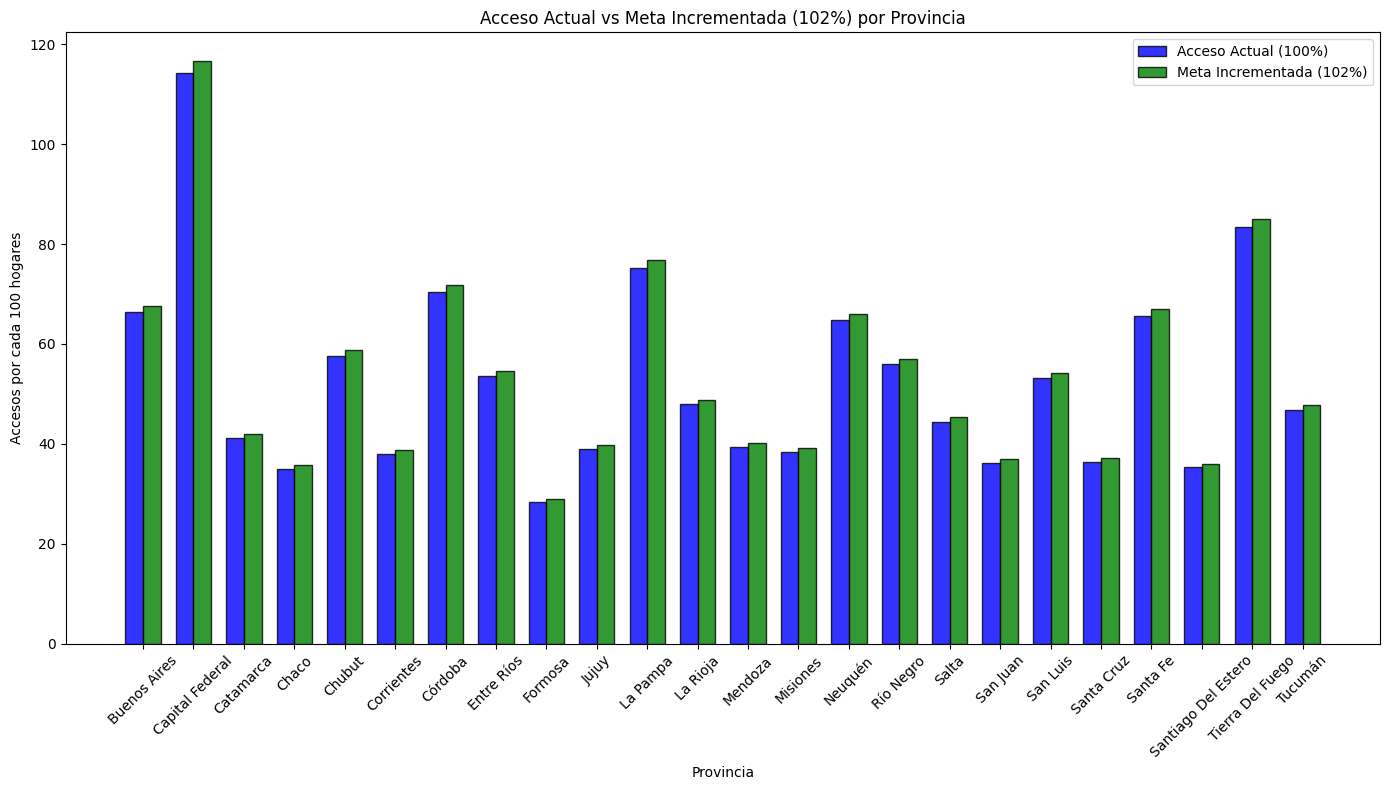

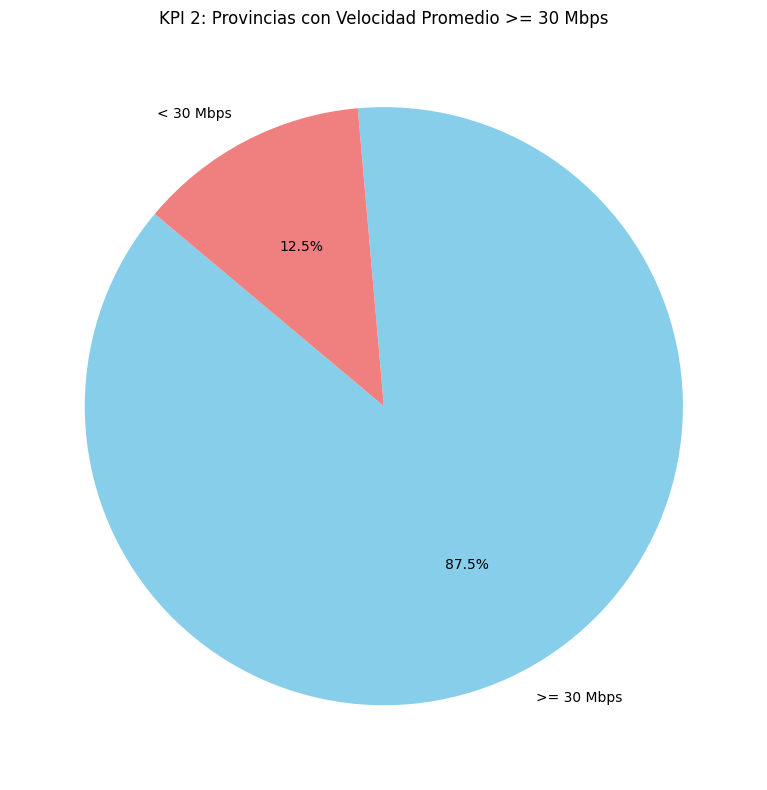

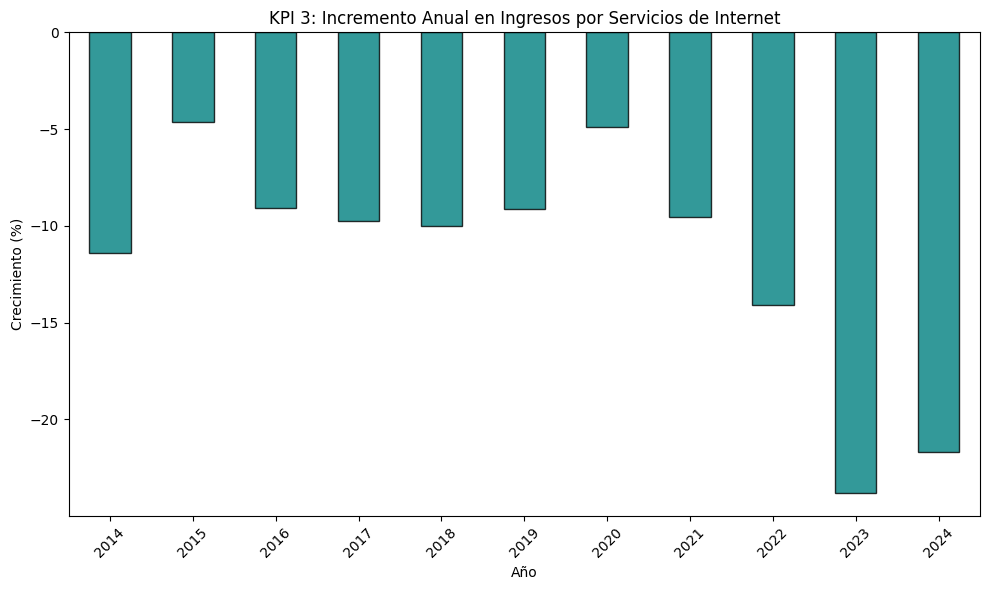

                     Accesos por cada 100 hogares   Meta 102%
Provincia                                                    
Buenos Aires                            66.297052   67.622993
Capital Federal                        114.247268  116.532213
Catamarca                               41.213171   42.037435
Chaco                                   34.976478   35.676008
Chubut                                  57.641113   58.793935
Corrientes                              37.966266   38.725591
Córdoba                                 70.302257   71.708302
Entre Ríos                              53.520019   54.590420
Formosa                                 28.366984   28.934324
Jujuy                                   39.058077   39.839239
La Pampa                                75.274059   76.779540
La Rioja                                47.911722   48.869956
Mendoza                                 39.383300   40.170966
Misiones                                38.424972   39.193471
Neuquén 

In [19]:
# Cargar la hoja 'Velocidad % por prov'
df_velocidad = data.parse("Velocidad % por prov")

# Convertir columnas relevantes a numéricas si es necesario
df_velocidad["Mbps (Media de bajada)"] = pd.to_numeric(df_velocidad["Mbps (Media de bajada)"], errors='coerce')

# Cargar la hoja 'Ingresos'
df_ingresos = data.parse("Ingresos")

# KPI 1: Crecimiento del acceso a internet en hogares
# Fórmula KPI = ((Nuevo acceso - Acceso actual) / Acceso actual) * 100
# Suponiendo un crecimiento objetivo del 2% en accesos actuales
df_penetracion_hogares["Meta 102%"] = (
    df_penetracion_hogares["Accesos por cada 100 hogares"] * 1.02
)

# Agrupar para calcular los valores promedio de acceso actual y la meta del 102%
metas_102_por_provincia = df_penetracion_hogares.groupby("Provincia")[["Accesos por cada 100 hogares", "Meta 102%"]].mean()


# KPI 2: Velocidad promedio de conexión objetivo
# Evaluar el porcentaje de provincias que alcanzan 30 Mbps como media
provincias_30_mbps = df_velocidad[df_velocidad["Mbps (Media de bajada)"] >= 30]["Provincia"].nunique()
total_provincias = df_velocidad["Provincia"].nunique()
kpi_velocidad = (provincias_30_mbps / total_provincias) * 100

# KPI 3: Incremento anual en ingresos
# Crecimiento relativo de ingresos entre años consecutivos
df_ingresos["Crecimiento Anual"] = df_ingresos["Ingresos (miles de pesos)"].pct_change() * 100
kpi_crecimiento_ingresos = df_ingresos.groupby("Año")["Crecimiento Anual"].mean()

# Visualización del KPI 1: Crecimiento de acceso en hogares
plt.figure(figsize=(14, 8))
provincias = metas_102_por_provincia.index
x = range(len(provincias))
bar_width = 0.35
plt.bar(x, metas_102_por_provincia["Accesos por cada 100 hogares"], width=bar_width, label="Acceso Actual (100%)", color='blue', edgecolor='k', alpha=0.8)
plt.bar([p + bar_width for p in x], metas_102_por_provincia["Meta 102%"], width=bar_width, label="Meta Incrementada (102%)", color='green', edgecolor='k', alpha=0.8)
plt.title("Acceso Actual vs Meta Incrementada (102%) por Provincia")
plt.xlabel("Provincia")
plt.ylabel("Accesos por cada 100 hogares")
plt.xticks([p + bar_width / 2 for p in x], provincias, rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

# Visualización del KPI 2: Porcentaje de provincias con más de 30 Mbps
labels = ['>= 30 Mbps', '< 30 Mbps']
sizes = [provincias_30_mbps, total_provincias - provincias_30_mbps]
plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=['skyblue', 'lightcoral'])
plt.title("KPI 2: Provincias con Velocidad Promedio >= 30 Mbps")
plt.tight_layout()
plt.show()

# Visualización del KPI 3: Incremento anual en ingresos
plt.figure(figsize=(10, 6))
kpi_crecimiento_ingresos.plot(kind='bar', color='teal', edgecolor='k', alpha=0.8)
plt.title("KPI 3: Incremento Anual en Ingresos por Servicios de Internet")
plt.xlabel("Año")
plt.ylabel("Crecimiento (%)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

print(metas_102_por_provincia)
kpi_velocidad
kpi_crecimiento_ingresos.tail()

# Mostrar resultados de los KPIs
print("KPI 1: Crecimiento en hogares")
print(df_penetracion_hogares[["Provincia", "KPI_Crecimiento"]].head())  # Muestra un ejemplo

print("\nKPI 2: Porcentaje de provincias con velocidades ≥ 30 Mbps")
print(f"{kpi_velocidad:.2f}%")

print("\nKPI 3: Incremento anual en ingresos")
print(kpi_crecimiento_ingresos)

### KPIs Calculados
1. **KPI 1: Crecimiento en Hogares**
   - Objetivo de +2% en todas las provincias analizadas.
2. **KPI 2: Velocidad ≥ 30 Mbps**
   - **87.5%** de las provincias alcanzaron el umbral.
3. **KPI 3: Incremento en Ingresos**
   - Crecimiento negativo en años recientes, especialmente en 2023 (-23.8067%) y 2024 (-21.6801%).